## Introduction

This is a classification project that aims for predicting credit risk or in simpler terms will help the companies to predict bad loans. Predicting the credibility of a loan is very useful in the Banking business. Using machine learning will help to decide, whether to approve a loan or not by accounting for the risk value based on historical data.

The data used in this project is obtained from the Kaggle(https://www.kaggle.com/kabure/german-credit-data-with-risk), which gives detailed information about the historical data of loan approved by German banks. The data contains a feature column that provides whether the loan was good or bad.

So this Classification project aims to predict the quality of the loan approved by German banks using various Classification algorithms. The project is structured as follows: starts with the understanding of the data and an exploratory data analysis of it, then followed by feature engineering and preprocessing section, then a section which details the models applied to the data and outcome of various models. Finally concludes the reports by summarising the findings achieved from evaluation metrics of models.

In [766]:
import pandas as pd,numpy as np,seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,classification_report
from sklearn.preprocessing import label_binarize
from colorsetup import colors, palette 
sns.set_palette(palette)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier

## Exploratory Data Analysis

The data we will be using is named 'German credit data', which contains details about loans offered by the German banks and which can be used to predict the credibility of the data. A brief glimpse of the data is shown below:

In [767]:
data = pd.read_csv('german_credit_data.csv')

In [768]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [769]:
#data.shape

The data contains 10 attributes which are:

1. Age (numeric)

2. Sex (text: male, female)

3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

4. Housing (text: own, rent, or free)

5. Saving accounts (text - little, moderate, quite rich, rich)

6. Checking account (numeric, in DM - Deutsch Mark)

7. Credit amount (numeric, in DM)

8. Duration (numeric, in the month)

9. Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others

10. Risk (Value target - Good or Bad Risk)

So total data has 10 columns and 1000 rows, that means this data is not that of a big data.
Here the Risk column is our target column, which classifies the loan into bad and good categories.



And the table below shows the types of our attributes. There are 6 categorical attributes including our target column and 5 numerical attributes. Since first column 'Unnamed:0' is just a column indicates number of each entry, we will delete this column.


In [770]:
data=data.drop('Unnamed: 0',1)

In [771]:

print(data.dtypes.to_markdown())

|                  | 0      |
|:-----------------|:-------|
| Age              | int64  |
| Sex              | object |
| Job              | int64  |
| Housing          | object |
| Saving accounts  | object |
| Checking account | object |
| Credit amount    | int64  |
| Duration         | int64  |
| Purpose          | object |
| Risk             | object |


A short description of numerical attributes is displayed below.

In [772]:
print(data.describe().T.to_markdown())

|               |   count |     mean |         std |   min |    25% |    50% |     75% |   max |
|:--------------|--------:|---------:|------------:|------:|-------:|-------:|--------:|------:|
| Age           |    1000 |   35.546 |   11.3755   |    19 |   27   |   33   |   42    |    75 |
| Job           |    1000 |    1.904 |    0.653614 |     0 |    2   |    2   |    2    |     3 |
| Credit amount |    1000 | 3271.26  | 2822.74     |   250 | 1365.5 | 2319.5 | 3972.25 | 18424 |
| Duration      |    1000 |   20.903 |   12.0588   |     4 |   12   |   18   |   24    |    72 |


From the short glimpse of our data, we can see that there were missing values for some attributes in our data. So let's check the missing values in the data.

In [773]:
print(data.isnull().sum().to_markdown())

|                  |   0 |
|:-----------------|----:|
| Age              |   0 |
| Sex              |   0 |
| Job              |   0 |
| Housing          |   0 |
| Saving accounts  | 183 |
| Checking account | 394 |
| Credit amount    |   0 |
| Duration         |   0 |
| Purpose          |   0 |
| Risk             |   0 |


So, the table above shows that there are 183 missing values for 'Savings account' and 394 for 'Checking account'. We will deal with these missing values in the preprocessing section, as for now, we can keep these values for exploratory data analysis.

In [774]:
cat_columns = data.dtypes[data.dtypes==np.object]
cat_columns = cat_columns.index.tolist()
cat_columns

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

In [775]:
num_columns = data.dtypes[data.dtypes!=np.object]
num_columns = num_columns.index.tolist()
#num_columns

First we will look into our target column that is 'Risk', it contains two catagorical value, bad and good loans. The propotion of two classes are 70% and 30% for good and bad respectively.

In [776]:
print(data['Risk'].value_counts().to_markdown())

|      |   Risk |
|:-----|-------:|
| good |    700 |
| bad  |    300 |


Below is the barplot of 'Risk' column which shows propotion of good and bad class. Eventhough the proption of classes are not balanced, I dont think it will have an notable influence on the predictions of different models, so dont need to balance the target column. 

<Figure size 360x360 with 0 Axes>

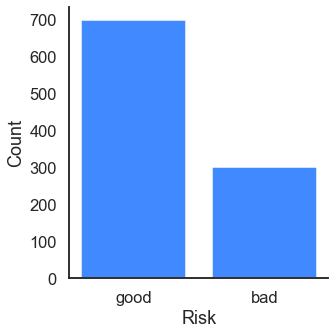

In [777]:
sns.set_context('talk')
plt.figure(figsize=(5,5))
sns.displot(data,x="Risk",multiple="dodge",shrink=0.8);


### Numerical columns Analysis

In this part, we will look into our numerical type data columns and examine the distribution of each column. So first we plotted a histogram of each numerical column to visualize the distribution of values and separated the distribution for different Risk values to understand the correlation columns with the target columns. Below are the distribution plots for each numerical columns:

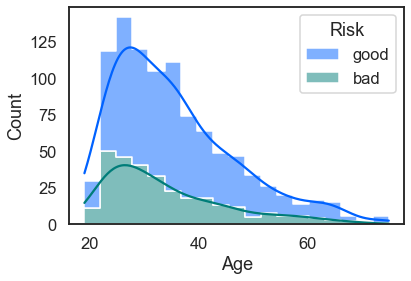

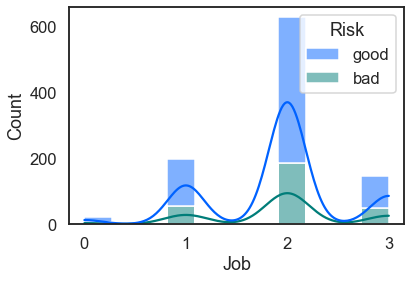

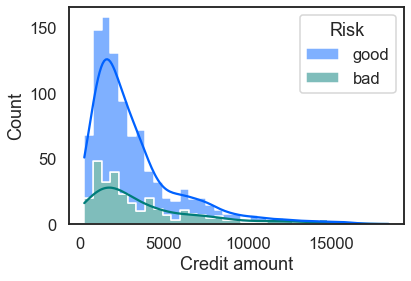

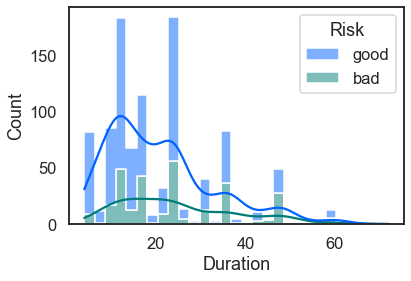

In [778]:

for i,col in enumerate(num_columns):
    plt.figure(i)
    sns.histplot(data, x=col, kde=True, hue="Risk",multiple="stack",element="step");

The distribution of these columns are looks similar for both risk value. The distributions are not normal, they are right-skewed, so we will have to do log transformations on these distributions. Also, we can note that the job column looks like it has a categorical value, not continuous values. So we can include this column too in the categorical category.

### Catagorical columns

We will be plotting count plots for each categorical column with different target columns. So these plots will show how each categorical correlates with the target column.

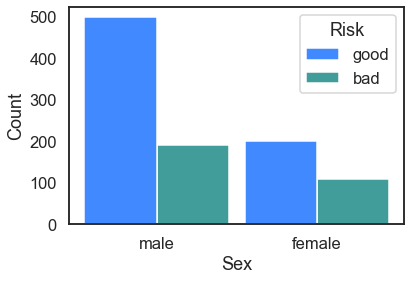

In [779]:
%matplotlib inline

sns.histplot(data,x="Sex",hue="Risk",shrink=0.9,multiple='dodge');


The count plot of sex shows that male customers are higher than female customers. The difference in the proportion of bad and good customers is very high for female customers compared to male customers.

Below is the count plot of other categorical value for both risk values:

In [780]:
def propotion_of_Risk(column):
    Good_loan=data[data["Risk"]=="good"][column].value_counts()    
    Bad_loan=data[data["Risk"]=="bad"][column].value_counts()    
    propotion=(Bad_loan/Good_loan).sort_values(ascending=False)    
    return propotion



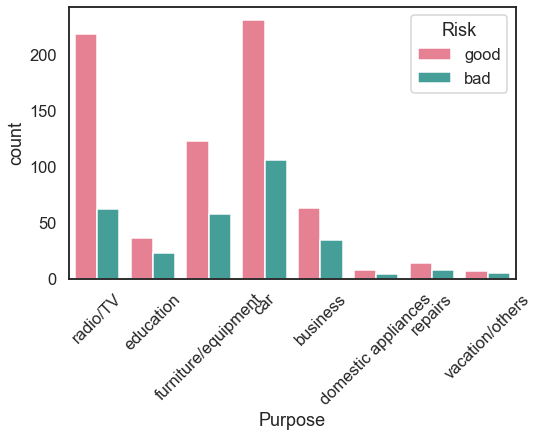

In [781]:
plt.figure(figsize=(8,5))
sns.countplot(x="Purpose", data=data, 
              palette="husl", hue = "Risk");
plt.xticks(rotation=45);




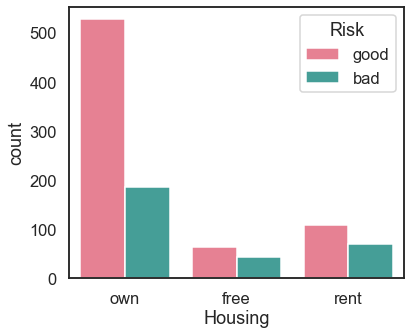

In [782]:
plt.figure(figsize=(6,5))
sns.countplot(x="Housing", data=data, 
              palette="husl", hue = "Risk");

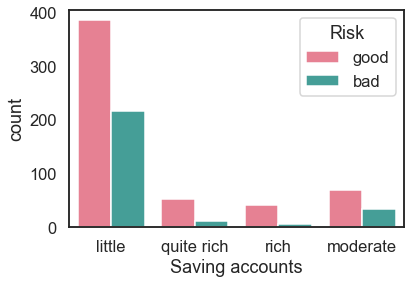

In [783]:
sns.countplot(x="Saving accounts", data=data, 
              palette="husl", hue = "Risk");

The count plot of the purpose of loan shows that to buy a car is most of the loan has been taken and it has a high number of a bad loan. This purpose doesn't have the highest proportion of good and bad loans. below is the table shows the proportion of different purposes:


In [784]:
print(propotion_of_Risk("Purpose").to_markdown())

|                     |   Purpose |
|:--------------------|----------:|
| vacation/others     |  0.714286 |
| education           |  0.638889 |
| repairs             |  0.571429 |
| business            |  0.539683 |
| domestic appliances |  0.5      |
| furniture/equipment |  0.471545 |
| car                 |  0.458874 |
| radio/TV            |  0.284404 |


Even though the car purpose has a high number of loans, it doesn't have many bad loans compared to good loans.
Similarly, the proportion of risks for the other two categorical values, which are Housing and Saving accounts is given below:



In [785]:
print(propotion_of_Risk("Housing").to_markdown())

|      |   Housing |
|:-----|----------:|
| free |  0.6875   |
| rent |  0.642202 |
| own  |  0.352941 |


In [786]:
print(propotion_of_Risk("Saving accounts").to_markdown())

|            |   Saving accounts |
|:-----------|------------------:|
| little     |          0.562176 |
| moderate   |          0.492754 |
| quite rich |          0.211538 |
| rich       |          0.142857 |


## Preprocessing and Feature Engineering

In this section, we will look into the step taken to clean the data and, the process has taken to change the data into a more useful form.

### Data Cleaning

As a first step, we will be taken care of the missing values in the Saving accounts and the Checking account. The number of missing values in these columns is once again shown below:

In [787]:
print(data.isnull().sum().to_markdown())

|                  |   0 |
|:-----------------|----:|
| Age              |   0 |
| Sex              |   0 |
| Job              |   0 |
| Housing          |   0 |
| Saving accounts  | 183 |
| Checking account | 394 |
| Credit amount    |   0 |
| Duration         |   0 |
| Purpose          |   0 |
| Risk             |   0 |


The Saving accounts have 183 missing values out of 1000 values, on the other hand, the checking account has 394 values. Because these columns are categorical values, we will be using the median to replace the missing values.

In [788]:
data["Saving accounts"].fillna(data['Saving accounts'].mode()[0], inplace=True)
data["Checking account"].fillna(data['Checking account'].mode()[0], inplace=True)

The number of missing values after the replacement is:

In [789]:
print(data.isnull().sum().to_markdown())

|                  |   0 |
|:-----------------|----:|
| Age              |   0 |
| Sex              |   0 |
| Job              |   0 |
| Housing          |   0 |
| Saving accounts  |   0 |
| Checking account |   0 |
| Credit amount    |   0 |
| Duration         |   0 |
| Purpose          |   0 |
| Risk             |   0 |


### Outlier Analysis

To check the presence of outliers on any column, we checked the values which are higher than 1.5 times Inter quartile Range(IQR) from the upper quartile and lower than 1.5 times the inter quartile range from the lower quartile.

Age : 23


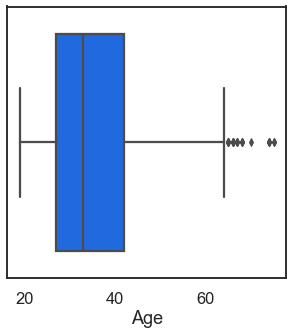

Credit amount : 72


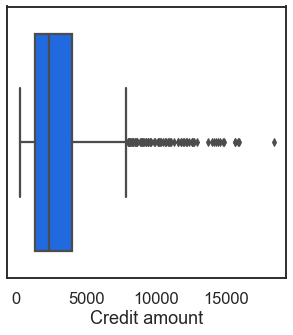

Duration : 70


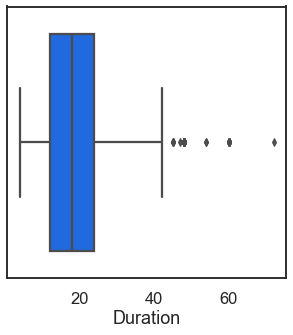

['Age', 'Credit amount', 'Duration']


In [790]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names, plot=True):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                plt.figure(figsize=(5,5))
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

#print(num_columns)
num_columns = ["Age","Credit amount","Duration"]
print(has_outliers(data, num_columns))

It is found out that, there are some outliers in the Age, Credit amount, and Duration columns. The number of an outlier in each column and visualization of outliers on the box plots are given above. To correct these outliers, we will replace outliers that are lower than the lower limit(lower quartile - 1.5 times IQR) with a lower limit and higher than the outer limit( upper quartile + 1.5 times IQR) with the outer limit of the columns.

In [791]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_columns:
    replace_with_thresholds(data, col)

#has_outliers(data, num_columns)

### One hot encoding

As a next step, we hot encoded the categorical variables and converted them into a form that could be provided to ML algorithms to do a better job in prediction. 

After one hot encoding the number of columns increases to 20 and new column names are shown below:

In [792]:
data = data.merge(pd.get_dummies(data.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
data = data.merge(pd.get_dummies(data.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
data = data.merge(pd.get_dummies(data.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
data = data.merge(pd.get_dummies(data["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
#data = data.merge(pd.get_dummies(data.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
data = data.merge(pd.get_dummies(data["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
#data = data.merge(pd.get_dummies(data["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [793]:
#data.head()#
#data.columns.to_list()

In [794]:
data.columns.to_list()

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk',
 'Purpose_car',
 'Purpose_domestic appliances',
 'Purpose_education',
 'Purpose_furniture/equipment',
 'Purpose_radio/TV',
 'Purpose_repairs',
 'Purpose_vacation/others',
 'Sex_male',
 'Housing_own',
 'Housing_rent',
 'Savings_moderate',
 'Savings_quite rich',
 'Savings_rich',
 'Check_moderate',
 'Check_rich']

In [795]:
droplist=["Sex","Housing","Saving accounts","Checking account","Purpose"]

data.drop(droplist, axis= 1, inplace = True)

In [796]:
#data.head()

In [797]:
#data.shape

In [798]:
print(data.describe().T.to_markdown())

|                             |   count |      mean |         std |   min |    25% |    50% |     75% |     max |
|:----------------------------|--------:|----------:|------------:|------:|-------:|-------:|--------:|--------:|
| Age                         |    1000 |   35.4535 |   11.1063   |    19 |   27   |   33   |   42    |   64.5  |
| Job                         |    1000 |    1.904  |    0.653614 |     0 |    2   |    2   |    2    |    3    |
| Credit amount               |    1000 | 3051.1    | 2187.14     |   250 | 1365.5 | 2319.5 | 3972.25 | 7882.38 |
| Duration                    |    1000 |   20.307  |   10.6152   |     4 |   12   |   18   |   24    |   42    |
| Purpose_car                 |    1000 |    0.337  |    0.472921 |     0 |    0   |    0   |    1    |    1    |
| Purpose_domestic appliances |    1000 |    0.012  |    0.10894  |     0 |    0   |    0   |    0    |    1    |
| Purpose_education           |    1000 |    0.059  |    0.235743 |     0 |    0   |    

In the above description table of data columns, for the columns such as Age,Credit amount and Duration the difference between the minimum and maximum values are huge. So we will be doing minmaxsclaer on these column and scales the value between 0 and 1. The description box after the scaling is given below:

In [799]:
num_col = ["Credit amount","Duration","Age"]
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
for column in [num_col]:
    data[column] = mm.fit_transform(data[column])

In [800]:
print(data.describe().T.to_markdown())

|                             |   count |     mean |      std |   min |      25% |      50% |      75% |   max |
|:----------------------------|--------:|---------:|---------:|------:|---------:|---------:|---------:|------:|
| Age                         |    1000 | 0.361615 | 0.244095 |     0 | 0.175824 | 0.307692 | 0.505495 |     1 |
| Job                         |    1000 | 1.904    | 0.653614 |     0 | 2        | 2        | 2        |     3 |
| Credit amount               |    1000 | 0.367003 | 0.286561 |     0 | 0.146154 | 0.271148 | 0.487692 |     1 |
| Duration                    |    1000 | 0.429132 | 0.279346 |     0 | 0.210526 | 0.368421 | 0.526316 |     1 |
| Purpose_car                 |    1000 | 0.337    | 0.472921 |     0 | 0        | 0        | 1        |     1 |
| Purpose_domestic appliances |    1000 | 0.012    | 0.10894  |     0 | 0        | 0        | 0        |     1 |
| Purpose_education           |    1000 | 0.059    | 0.235743 |     0 | 0        | 0        | 0 

After one hot encoding plotted the heatmap correlation between columns and target variable:

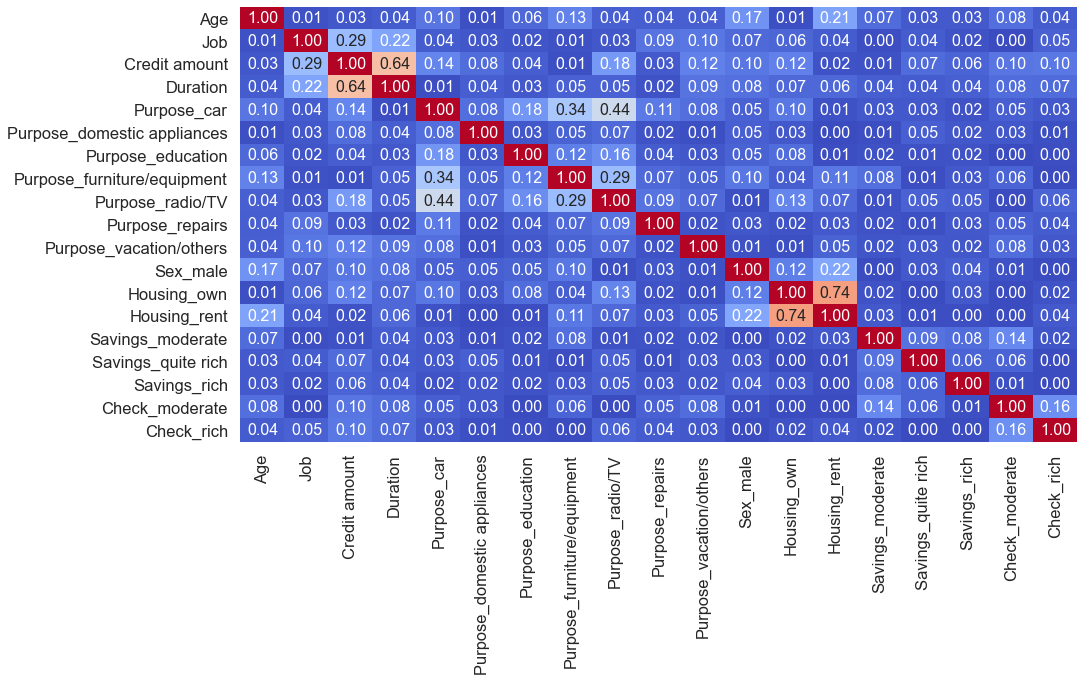

In [801]:
corr = data.corr()
corr

plt.figure(figsize=(15,8));
sns.heatmap(abs(corr),cmap='coolwarm',annot=True,
            fmt=".2f",
            annot_kws={'size':16},
            cbar=False);

In [802]:
#data["Risk"]

In [803]:
data['Risk']=data['Risk'].replace('bad',0)
data['Risk']=data['Risk'].replace('good',1)


Since the Risk column is our target column, I comverted the column to binary values 1 and 0, 1 for good loans and 0 for bad loans. So this conversion will help to classify the risk of loans.

In [804]:
print(data["Risk"].head().to_markdown())

|    |   Risk |
|---:|-------:|
|  0 |      1 |
|  1 |      0 |
|  2 |      1 |
|  3 |      1 |
|  4 |      0 |


## Data Modelling

After analysis and cleaning of the data, we will try to predict the risk of transactions utilizing machine learning classification algorithms. So in this section, we will apply some algorithm such as Logistic regression with and without regularization, Decision Tree, Random Forest, Gradient boosting and Stacking and accurately predicts whether a loan is good or bad.

Before applying the model, we will split our dataset to train and test set, with 70 and 30 percentage. We will be using this split train and test set for our entire modeling. Here we used sklearn 'StratifiedShuffleSplit' to maintain the same ratio of predictor classes.

The two tables below show the percentage of two classes in the Risk column, and both are the same with 70% of 1 class which indicates the good class, and 30% of the 0 class which are bad class.



In [805]:
feauture_cols = data.drop('Risk',axis=1).columns.to_list()
#feauture_cols

In [806]:

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feauture_cols], data.Risk))

# Create the dataframes
X_train = data.loc[train_idx, feauture_cols]
y_train = data.loc[train_idx, 'Risk']

X_test  = data.loc[test_idx, feauture_cols]
y_test  = data.loc[test_idx, 'Risk']

In [807]:
print(y_train.value_counts(normalize=True).to_markdown())

|    |   Risk |
|---:|-------:|
|  1 |    0.7 |
|  0 |    0.3 |


In [808]:
print(y_test.value_counts(normalize=True).to_markdown())

|    |   Risk |
|---:|-------:|
|  1 |    0.7 |
|  0 |    0.3 |


### Logistic Regression

The first model we are trying to predict the class is Logistic Regression. To prevent we will be using regularization in our model. We will try both Ridge(L2) and Lasso(L1) regularization and uses evaluation metrics to compare which regularization provides better accuracy.

So we apply Logistic Regression with regularization, with l1 and l2 regularization. A short glimpse of predicted values and the probability of predicting three methods is given below:



In [809]:

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [810]:

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [811]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)


In [812]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)
print("Predicted values:")
print(y_pred.head().to_markdown())

Predicted values:
|    |   lr |   l1 |   l2 |
|---:|-----:|-----:|-----:|
|  0 |    1 |    1 |    1 |
|  1 |    1 |    1 |    1 |
|  2 |    1 |    1 |    1 |
|  3 |    1 |    1 |    1 |
|  4 |    0 |    0 |    0 |


So from the table, we can see that, for the first four rows, all three methods predicted the same value, but for the 5th entry, regression without regularization predicted differently.

In [813]:
print("Prediction Probabilities:")
print(y_prob.head().to_markdown())

Prediction Probabilities:
|    |       lr |       l1 |       l2 |
|---:|---------:|---------:|---------:|
|  0 | 0.794728 | 0.784209 | 0.776756 |
|  1 | 0.715493 | 0.751868 | 0.720443 |
|  2 | 0.67432  | 0.723267 | 0.68053  |
|  3 | 0.738843 | 0.720196 | 0.72302  |
|  4 | 0.581843 | 0.576225 | 0.59904  |


The table above with the prediction probability shows a drastic variation in probability. So we will examine the evaluation metrics for these models. Precision, recall, fscore, and AUC have been calculated and the values are given below:

In [814]:

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [815]:
print(metrics.to_markdown())

|           |       lr |       l1 |       l2 |
|:----------|---------:|---------:|---------:|
| precision | 0.68069  | 0.661445 | 0.668148 |
| recall    | 0.713333 | 0.703333 | 0.706667 |
| fscore    | 0.662583 | 0.646108 | 0.651667 |
| accuracy  | 0.713333 | 0.703333 | 0.706667 |
| auc       | 0.566667 | 0.55     | 0.555556 |


The table above with the metrics clearly shows the difference in the evaluation metrics for different models. the logical regression without any regularization produces better prediction comparatively. But overall the accuracies are not good, so we will try out different classification algorithms.

The Confusion matrix of regressions are given below:

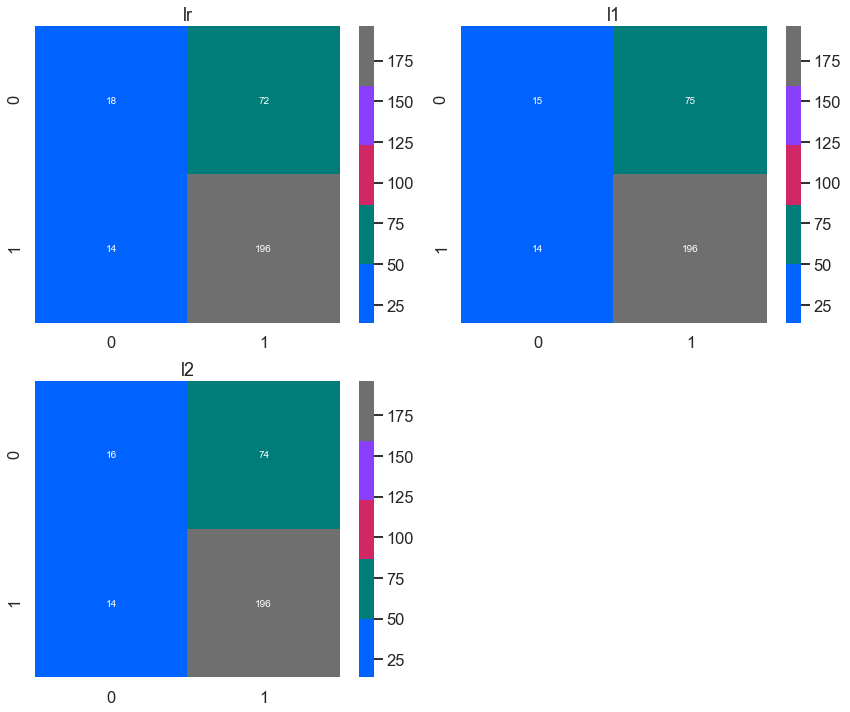

In [816]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);
    
plt.tight_layout()

### K nearest neighbors

The next algorithm we are going to deploy is the K nearest neighbor. To find out the best k for the prediction, we use cross-validation with K from 1 to 40 and using the Elbow method to determine the best K. We use the same train and test dataset that we used for logistic regression.

In [817]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

#print(f1_results)
#print(error_results)

<Figure size 216x216 with 0 Axes>

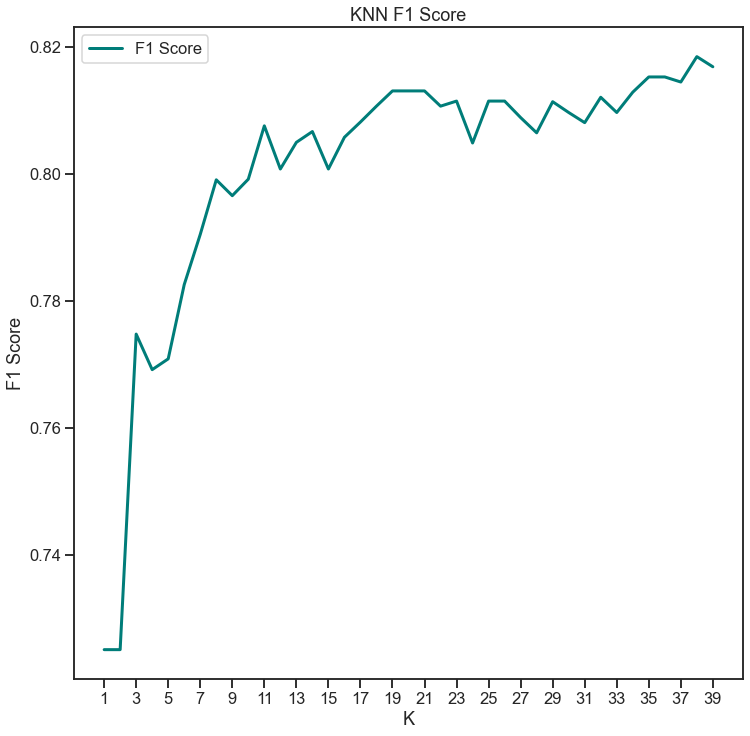

In [818]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(figsize=(3,3))
ax = f1_results.set_index('K').plot(color=colors[1], figsize=(12, 12), linewidth=3)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score');

<Figure size 216x216 with 0 Axes>

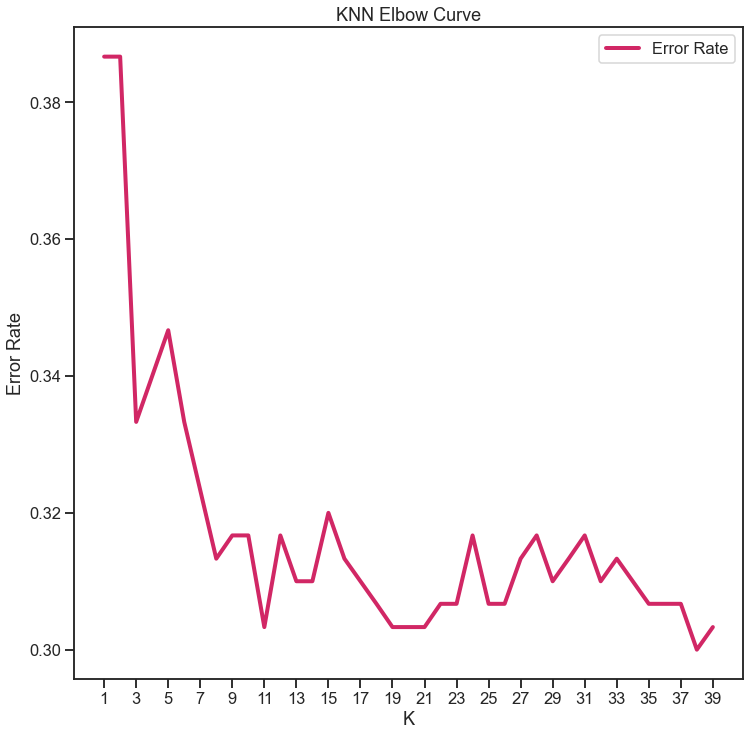

In [819]:
#sns.set_context('talk')
sns.set_style('ticks')

plt.figure(figsize=(3,3));
ax = error_results.set_index('K').plot(color=colors[2], figsize=(12, 12), linewidth=4)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve');

Above are the elbow plots, with Error Rate and F1 score and it shows that K around 32 is the optimum value, because that is the point in which after that there is not much difference in the error rate. So we will apply our KNN algorithm with K= 32 and predicts the loan class.

In [820]:
knn = KNeighborsClassifier(n_neighbors=32, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_KNN),
                         'precision': precision_score(y_test, y_pred_KNN),
                         'recall': recall_score(y_test, y_pred_KNN),
                         'f1': f1_score(y_test, y_pred_KNN),
                         'auc': roc_auc_score(y_test, y_pred_KNN)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.46      0.07      0.12        90
           1       0.71      0.97      0.82       210

    accuracy                           0.70       300
   macro avg       0.58      0.52      0.47       300
weighted avg       0.63      0.70      0.61       300

   accuracy  precision    recall        f1       auc
0      0.69   0.705263  0.957143  0.812121  0.511905


So the KNN algorithm predicted the loan value with 70% accuracy. The bad class with 67% precision and the good class with 72% precision. The recall of predicting bad class is very low, it is beacuse of the small size of the bad class data. Even though the accuracy we attained far better than the logistic regression, the accuracy is still not better. 

Below is the confusion matrix of the prediction.

Text(0.5, 58.5, 'Ground Truth')

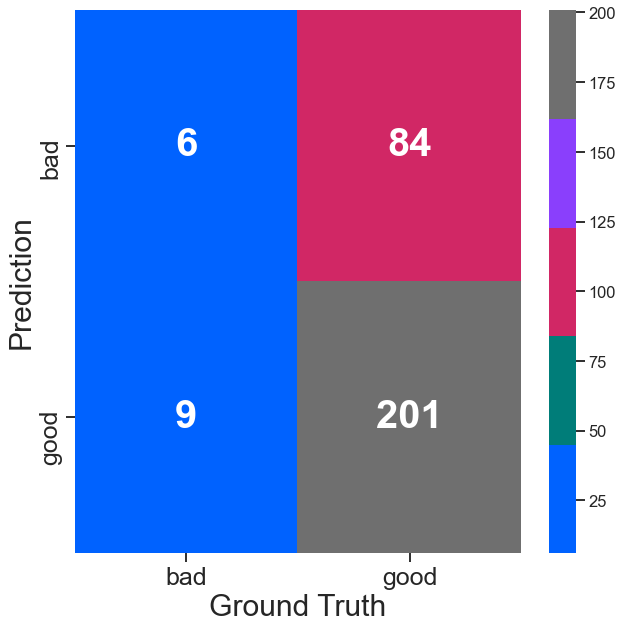

In [821]:
_, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['bad', 'good']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

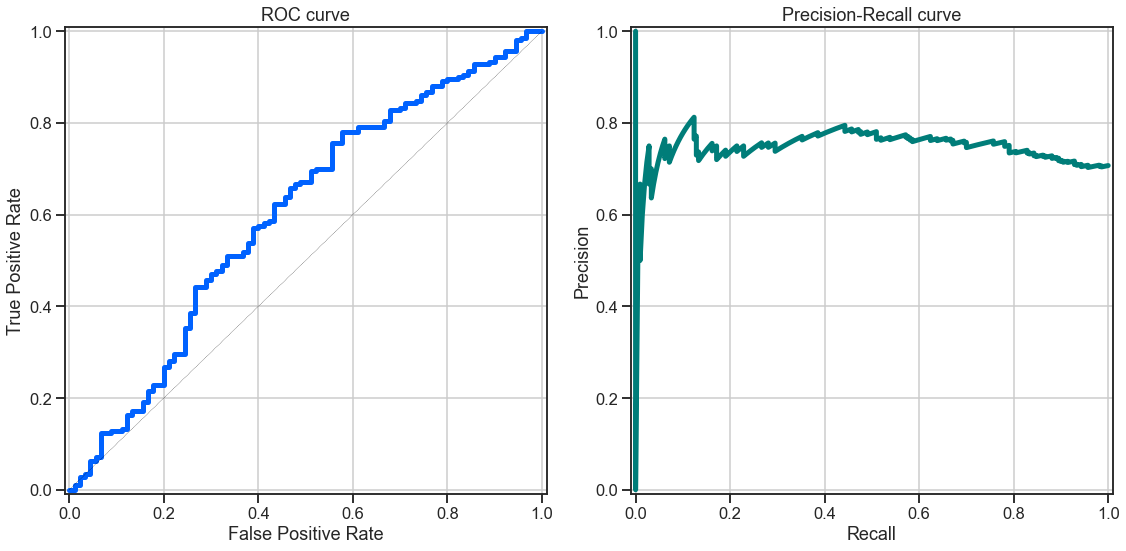

In [822]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob_KNN = knn.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_KNN[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob_KNN[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

### Random Forest

The next algorithm we will be deploying is the Random Forest. Here we try the different number of trees and find out the best parameter with the out-of-bag error. We used tree numbers from 15 to 400 and plotted the out-of-bag error with the tree number.

In [823]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [824]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=False,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

print(rf_oob_df.to_markdown())

|   n_trees |      oob |
|----------:|---------:|
|        15 | 0.361429 |
|        20 | 0.344286 |
|        30 | 0.328571 |
|        40 | 0.322857 |
|        50 | 0.315714 |
|       100 | 0.308571 |
|       150 | 0.305714 |
|       200 | 0.3      |
|       300 | 0.304286 |
|       400 | 0.314286 |


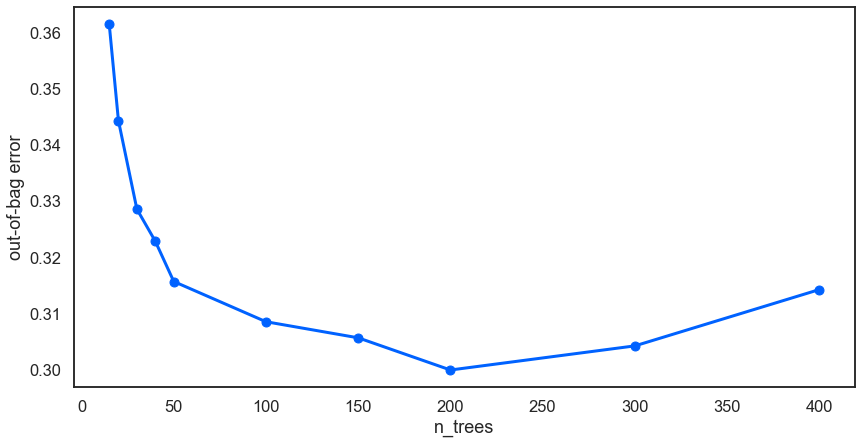

In [825]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=3)
ax.set(ylabel='out-of-bag error');

The error looks like to stabilizes around tree number 200. So we will apply a random forest with 200 trees for prediction.

In [826]:

RF=RF.set_params(n_estimators=200)

y_pred_RF = RF.predict(X_test)

In [827]:
cr = classification_report(y_test, y_pred_RF)    
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_RF),
                         'precision': precision_score(y_test, y_pred_RF),
                         'recall': recall_score(y_test, y_pred_RF),
                         'f1': f1_score(y_test, y_pred_RF),
                         'auc': roc_auc_score(y_test, y_pred_RF)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.51      0.26      0.34        90
           1       0.74      0.90      0.81       210

    accuracy                           0.70       300
   macro avg       0.62      0.58      0.57       300
weighted avg       0.67      0.70      0.67       300

   accuracy  precision    recall        f1       auc
0  0.703333   0.737255  0.895238  0.808602  0.575397


So the evaluation matrix for this model not better than the KNN model. The accuracy is still 70%.

The confusion matrix of the prediction is:

Text(0.5, 40.5, 'Ground Truth')

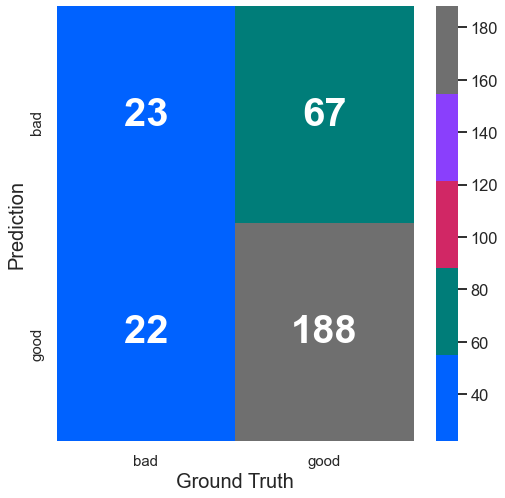

In [828]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_RF)
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})

labels = ['bad', 'good']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Prediction', fontsize=20);
ax.set_xlabel('Ground Truth', fontsize=20)

The ROC-AUC and precision-recall curves are shown below:

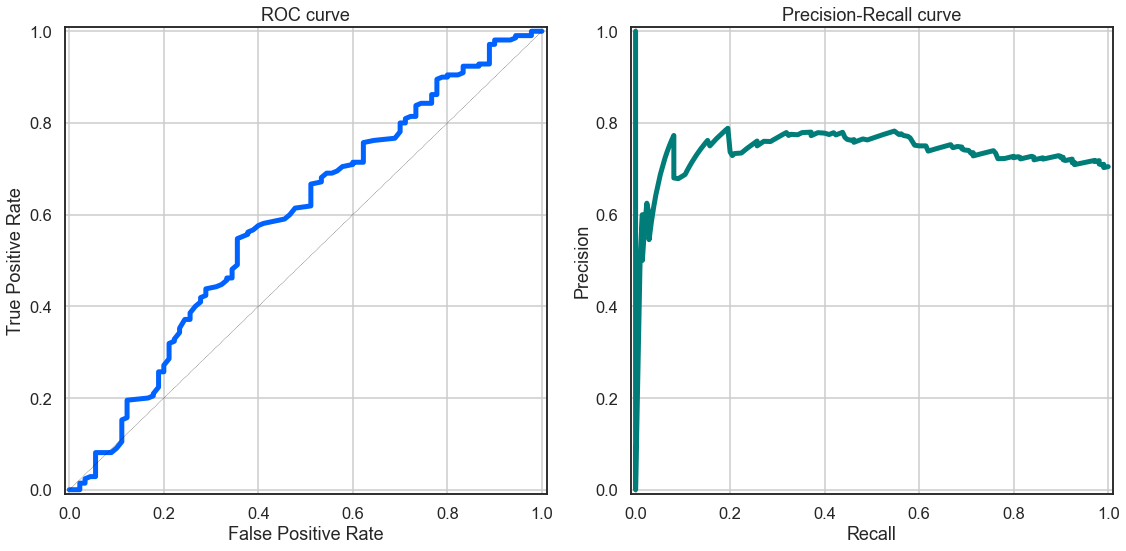

In [829]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob_RF = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_RF[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob_RF[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

### Gradient Boosting

Here we use Gradient Boosting Decision trees for prediction. Instead of using random values for hyperparameter, we use the GridSearchCV cross-validation method to find out the optimum hyperparameters.



In [830]:
tree_list = [15, 25, 50, 100, 200, 400]

In [833]:
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      )

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

In [834]:
import pickle
pickle.dump(GV_GBC,open('GV_GBC.p','wb'))

In [835]:
GV_GBC = pickle.load(open('GV_GBC.p','rb'))

In [836]:
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=3, n_estimators=25, random_state=42)

In [534]:
y_pred_GBC = GV_GBC.predict(X_test)
print(classification_report(y_pred_GBC, y_test))

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_GBC),
                         'precision': precision_score(y_test, y_pred_GBC),
                         'recall': recall_score(y_test, y_pred_GBC),
                         'f1': f1_score(y_test, y_pred_GBC),
                         'auc': roc_auc_score(y_test, y_pred_GBC)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.11      0.48      0.18        21
           1       0.95      0.71      0.81       279

    accuracy                           0.70       300
   macro avg       0.53      0.59      0.50       300
weighted avg       0.89      0.70      0.77       300

   accuracy  precision    recall        f1       auc
0  0.696667   0.713262  0.947619  0.813906  0.529365


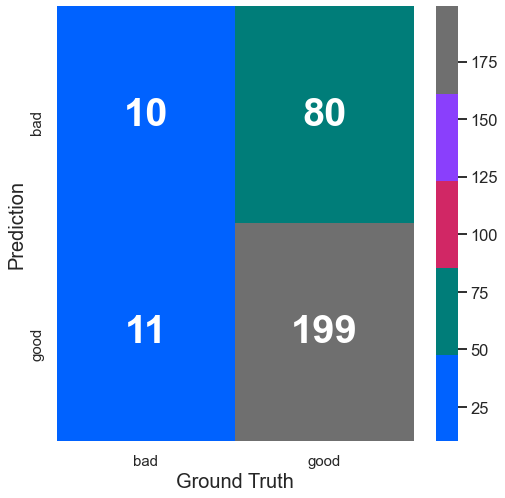

In [758]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_GBC)
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})

labels = ['bad', 'good']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Prediction', fontsize=20);
ax.set_xlabel('Ground Truth', fontsize=20);

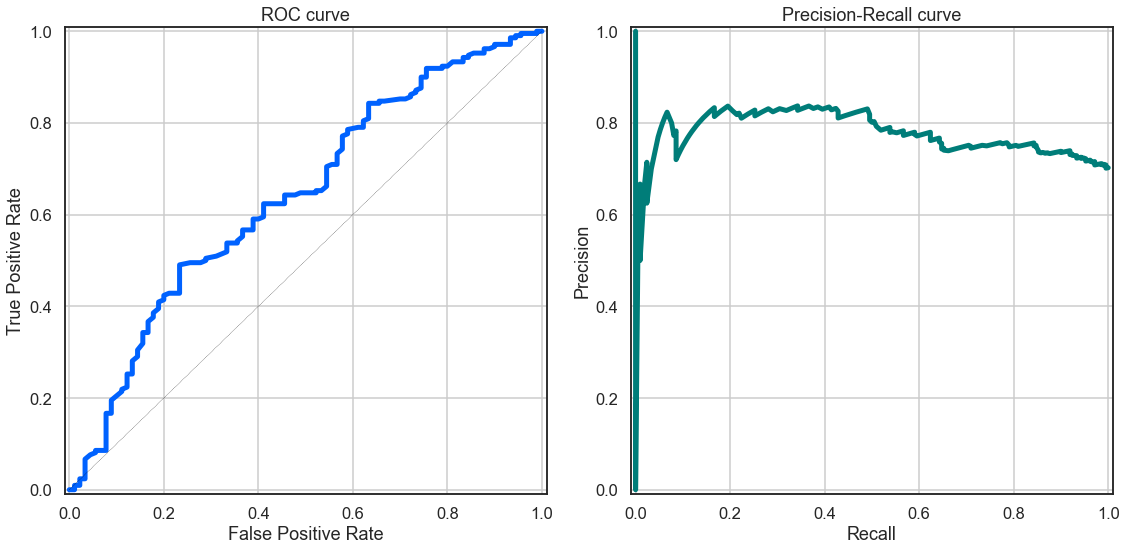

In [536]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob_GBC = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_GBC[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob_GBC[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

The accuracy score for prediction with gradient boosting Decision tree is 69%, which is not better than other models.

### Staking

In this model, we will try to fit Gradient boosting along with regression with regularization using Voting Classifier. Performance for the voting classifier should improve relative to either logistic regression or gradient boosted trees alone.

In [837]:
from sklearn.ensemble import VotingClassifier

# The combined model--logistic regression and gradient boosted trees
estimators = [('LR_L2', lr_l2), ('GBC', GV_GBC)]


# Though it wasn't done here, it is often desirable to train 
# this model using an additional hold-out data set and/or with cross validation
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

In [579]:
y_pred_VC = VC.predict(X_test)
print(classification_report(y_test, y_pred_VC))

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_VC),
                         'precision': precision_score(y_test, y_pred_VC),
                         'recall': recall_score(y_test, y_pred_VC),
                         'f1': f1_score(y_test, y_pred_VC),
                         'auc': roc_auc_score(y_test, y_pred_VC)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.57      0.14      0.23        90
           1       0.72      0.95      0.82       210

    accuracy                           0.71       300
   macro avg       0.64      0.55      0.53       300
weighted avg       0.67      0.71      0.64       300

   accuracy  precision    recall        f1       auc
0      0.71   0.722022  0.952381  0.821355  0.548413


So when using the Voting classifier to stack logistic regression and Gradient Boosting the accuracy score got a little better with 71%.  So as a next step I used KNN along with Gradient boosting because those are the two model which produced better accuracy score.

So evaluation matrics for stacking KNN and Gradient boosting is:

In [580]:
estimators = [('KNN', knn), ('GBC', GV_GBC)]

# Though it wasn't done here, it is often desirable to train 
# this model using an additional hold-out data set and/or with cross validation
VC_KNN = VotingClassifier(estimators, voting='soft')
VC_KNN = VC_KNN.fit(X_train, y_train)

In [581]:
y_pred_VC_KNN = VC_KNN.predict(X_test)
print(classification_report(y_test, y_pred_VC_KNN))

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_VC_KNN),
                         'precision': precision_score(y_test, y_pred_VC_KNN),
                         'recall': recall_score(y_test, y_pred_VC_KNN),
                         'f1': f1_score(y_test, y_pred_VC_KNN),
                         'auc': roc_auc_score(y_test, y_pred_VC_KNN)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.67      0.13      0.22        90
           1       0.72      0.97      0.83       210

    accuracy                           0.72       300
   macro avg       0.70      0.55      0.53       300
weighted avg       0.71      0.72      0.65       300

   accuracy  precision    recall        f1       auc
0      0.72   0.723404  0.971429  0.829268  0.552381


As expected the accuracy score got better, increased to 72%, which is the best accuracy score we got so far. The confusion matrix for this model looks like this:

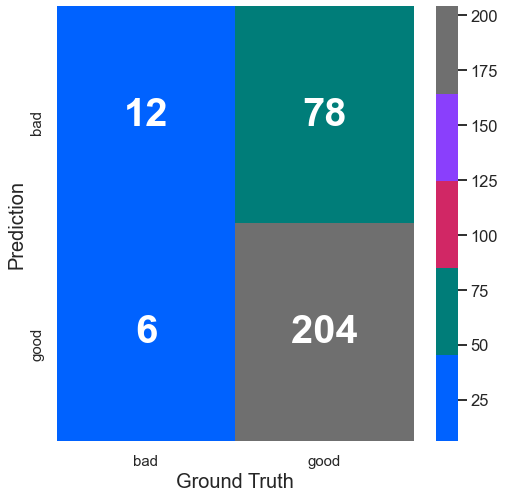

In [839]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_VC_KNN)
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})

labels = ['bad', 'good']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Prediction', fontsize=20);
ax.set_xlabel('Ground Truth', fontsize=20);


From the Confusion matrix, we can see that it correctly predicted 12 bad classes out of 18, and for a good class, 204 there is 204 correct prediction in a total of 282.

The ROC-AUC curve and Precision-Recall curve is given below. These curves visualize a better prediction compared to other models.

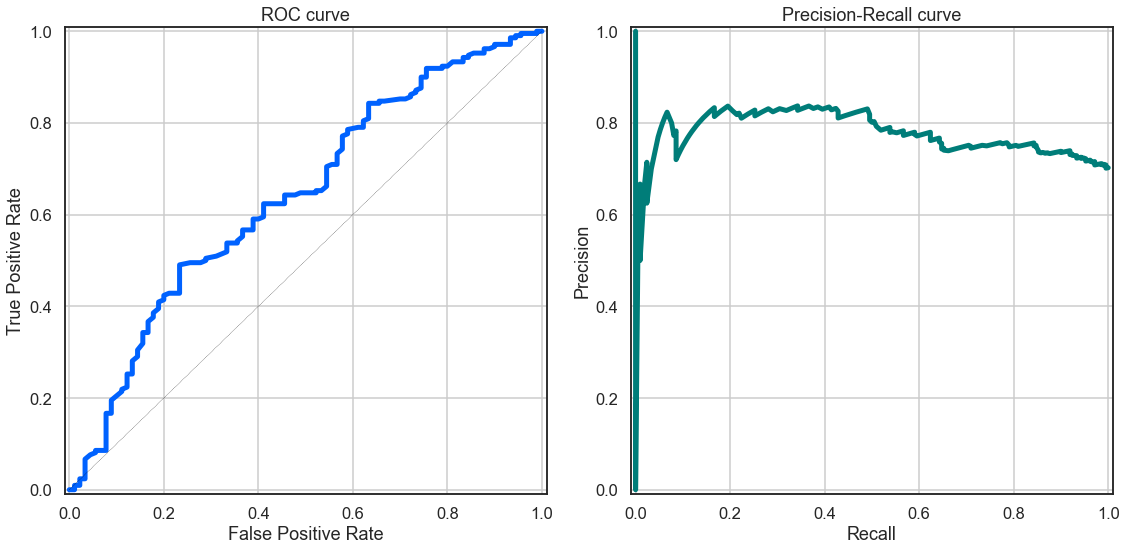

In [553]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_pred_VC_KNN = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_VC_KNN[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_VC_KNN[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

## Result

This project aimed to predict the risk of the loan offered by German Banks. So we applied different model for the prediction, the summarised accuracy score of all the model we have used given below:

In [586]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    #accuracy     = accuracy_score(testing_y,predictions)
    accuracy     = accuracy_score(testing_y, predictions)
    precision    = precision_score(testing_y, predictions)
    recall       = recall_score(testing_y, predictions)
    f1           = f1_score(testing_y, predictions)
    auc          = roc_auc_score(testing_y, predictions)
    df = pd.DataFrame({"Model"               : [name],
                       "Accuracy Score"      : [accuracy],
                       "Precision Score"     : [precision],
                       "Recall Score"        : [recall],
                       "F1 score"            : [f1],
                       "AUC Score"           : [auc]
                       
                      })
    return df

model1 = model_report(lr,X_train,X_test,y_train,y_test,
                      "Linear Regression")
model2 = model_report(lr_l1,X_train,X_test,y_train,y_test,
                      "Linear Regression l1")
model3 = model_report(lr_l2,X_train,X_test,y_train,y_test,
                      "Linear Regression l2")

model4 = model_report(knn,X_train,X_test,y_train,y_test,
                      "KNN")

model5 = model_report(RF,X_train,X_test,y_train,y_test,
                      "Random Forest")

model6 = model_report(GV_GBC,X_train,X_test,y_train,y_test,
                      "Gradient Boosting")

model7 = model_report(VC,X_train,X_test,y_train,y_test,
                      "Stacking LogR & Boosting")

model8 = model_report(VC_KNN,X_train,X_test,y_train,y_test,
                      "Stacking KNN & Boosting")


model_performances = pd.concat([model1,model2,model3,model4,model5,model6,model7,model8],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

In [841]:
model_performances

,Model,Accuracy Score,Precision Score,Recall Score,F1 score,AUC Score
0,Linear Regression,0.716667,0.732342,0.938095,0.822547,0.569048
1,Linear Regression l1,0.706667,0.722628,0.942857,0.818182,0.549206
2,Linear Regression l2,0.710000,0.725275,0.942857,0.819876,0.554762
3,KNN,0.716667,0.719298,0.976190,0.828283,0.543651
4,Random Forest,0.696667,0.733333,0.890476,0.804301,0.567460
5,Gradient Boosting,0.696667,0.713262,0.947619,0.813906,0.529365
6,Stacking LogR & Boosting,0.710000,0.722022,0.952381,0.821355,0.548413
7,Stacking KNN & Boosting,0.720000,0.723404,0.971429,0.829268,0.552381


From the analysis of the above table, we can understand that the model with K nearest Neighbour and Gradient boosting, logical regression with l2 regularization, and surprisingly regression without any regularization performed well, compared to others. The precision score and Area under curve have the highest values in the Regression without regularization model, but Accuracy, Recall score and F1 score is best with the stacking method.

Still, all these models couldn't predict the Risk factor of the Bank loan, with an accuracy above 75%. In a real-world case, an accurate prediction of at least 80% will be useful. This reduction of accuracy is coming from the imbalance of the data. For all the model, the recall score of class 0, that is a bad loan is very low compared to class 1. That is because of the small number of 0 class presence in the data.




## Summary and Future Insights

The main goal of this project was to predict the Risk factor of loans approved by the German Banks. For this, we had historical data of loans provided by the banks, and we cleaned and preprocessed data to make it useful for our prediction. Then we deployed, the classification algorithm such as Logical Regression with(l1 & l2) and without Regression, K nearest Neighbour method, Random Forest, Gradient Boosting, and finally stacking of Gradient Boosting with Logical regression and KNN. From the analysis of evaluation matrics of these models, we found that logical regression and Stacking of KNN with Gradient Boosting performed well, with around 71% accuracy.

I believe that this model couldn't predict the class of bank loans with 80% or more accuracy is because of the imbalance in the data. The percentage of class 0 in the data is 30%. So as the next step to this project we could try to balance the data with a different technique like Synthetic Minority Oversampling Technique (SMOTE) and Adaptive Synthetic sampling (ADASYN). Another step we can include here to improve our accuracy score by adding additional features useful for prediction. These additional features will be the time taken to return the loan, Bank Balance of the customer. Then a model could predict these classes with more accuracy.

